In [18]:
import pickle
import netdataio
import graph_conv_many_nuc_util
import torch

In [200]:
filename = 'graph_conv_many_nuc_pipeline.datasets/graph_conv_many_nuc_pipeline.data.13C.nmrshiftdb_hconfspcl_nmrshiftdb.aromatic.64.0.mol_dict.pickle'
d = pickle.load(open(filename, 'rb'))

In [201]:
hparams = graph_conv_many_nuc_util.DEFAULT_DATA_HPARAMS

In [202]:
graph_conv_many_nuc_util.DEFAULT_DATA_HPARAMS

{'feat_vect_args': {'feat_atomicno_onehot': [1, 6, 7, 8, 9, 15, 16, 17],
  'feat_pos': False,
  'feat_atomicno': True,
  'feat_valence': True,
  'aromatic': True,
  'hybridization': True,
  'partial_charge': False,
  'formal_charge': True,
  'r_covalent': False,
  'total_valence_onehot': True,
  'r_vanderwals': False,
  'default_valence': True,
  'rings': True},
 'feat_mat_args': {'feat_distances': False, 'feat_r_pow': None},
 'adj_args': {'edge_weighted': False,
  'norm_adj': True,
  'add_identity': True,
  'split_weights': [1, 1.5, 2, 3]}}

In [203]:
len(d)

5

In [204]:
d.keys()

dict_keys(['train_df', 'test_df', 'MAX_N', 'spectra_config', 'tgt_nucs'])

In [205]:
d['train_df']

,molecule_id,rdmol,spectra_ids,value
0,4001,<rdkit.Chem.rdchem.Mol object at 0x1a30bb5630>,[1],"[{15: 193.4, 11: 203.0, 2: 33.5, 14: 33.5, 1: ..."
2,4003,<rdkit.Chem.rdchem.Mol object at 0x1a30bb59b0>,[3],"[{10: 26.1, 9: 23.3, 6: 23.5, 1: 132.1, 8: 23...."
3,4004,<rdkit.Chem.rdchem.Mol object at 0x1a30bb5cb0>,[4],"[{4: 38.7, 8: 38.7, 6: 73.5, 15: 25.2, 11: 18...."
4,4006,<rdkit.Chem.rdchem.Mol object at 0x1a30bb5bb0>,[6],"[{8: 120.9, 5: 146.0, 2: 109.4, 4: 159.8, 15: ..."
6,4009,<rdkit.Chem.rdchem.Mol object at 0x1a30bb5b30>,[9],"[{26: 62.8, 22: 78.44, 0: 95.68, 1: 96.13, 7: ..."
...,...,...,...,...
26908,44689,<rdkit.Chem.rdchem.Mol object at 0x1a331b1730>,[49498],"[{2: 70.9, 16: 73.8, 13: 27.8, 14: 120.5, 10: ..."
26909,44692,<rdkit.Chem.rdchem.Mol object at 0x1a331b17b0>,[49504],"[{0: 98.2, 10: 134.0, 6: 145.3, 9: 120.6, 11: ..."
26910,44693,<rdkit.Chem.rdchem.Mol object at 0x1a331b1830>,[49505],"[{13: 24.5, 8: 51.8, 17: 148.7, 11: 69.5, 19: ..."
26911,44695,<rdkit.Chem.rdchem.Mol object at 0x1a331b18b0>,[49508],"[{17: 23.1, 6: 75.2, 16: 176.4, 1: 47.6, 14: 7..."


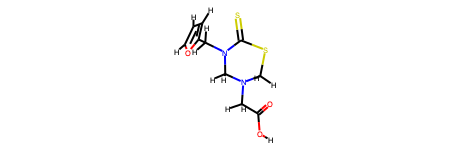

In [206]:
d['train_df']['rdmol'][11]

In [208]:
d['train_df']['value'][0]

[{15: 193.4,
  11: 203.0,
  2: 33.5,
  14: 33.5,
  1: 41.8,
  6: 26.5,
  10: 17.6,
  8: 140.99,
  0: 18.3,
  4: 42.0,
  7: 158.3,
  12: 22.6,
  5: 31.7,
  3: 42.2,
  9: 78.34}]

In [9]:
d['MAX_N']

64

In [10]:
d['spectra_config']

[('13C', 'dataset.named/spectra.nmrshiftdb_13C.feather')]

In [11]:
d['tgt_nucs']

['13C']

In [12]:
train_df = d['train_df']
tgt_nucs = d['tgt_nucs']
test_df = d['test_df'] #.sample(10000, random_state=10)

In [13]:
MAX_N = d['MAX_N']

datasets = {}

for phase, df in [('train', train_df), 
                  ('test', test_df)]:


    ds = netdataio.MoleculeDatasetMulti(df.rdmol.tolist(), 
                                        df.value.tolist(),  
                                        MAX_N, len(tgt_nucs), 
                                        hparams['feat_vect_args'], 
                                        hparams['feat_mat_args'], 
                                        hparams['adj_args'])        
    datasets[phase] = ds

In [219]:
len(datasets['train'][0])

5

In [222]:
adj = datasets['train'][0][0]

In [225]:
adj[0]

tensor([[0.2000, 0.2000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 0.2000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [226]:
adj[1]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [227]:
adj[2]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [229]:
print(adj[3])

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [231]:
torch.set_printoptions(profile="full")
print(adj[3][0])
torch.set_printoptions(profile="default")

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [237]:
for i in range(len(adj[0])):
    for j in range(len(adj[0][i])):
        if j != i and adj[0][i][j] != 0:
            print(adj[0][i], i)

tensor([0.2000, 0.2000, 0.0000, 0.0000, 0.0000, 0.2000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.3162, 0.3162, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000]) 0
tensor([0.2000, 0.2000, 0.0000, 0.0000, 0.0000, 0.2000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.3162, 0.3162, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.000

In [6]:
from tqdm import tqdm

In [9]:
for i in tqdm(range(1000)):
    import netdataio

100%|██████████| 1000/1000 [00:00<00:00, 102492.58it/s]


In [10]:
import torch

In [31]:
x = torch.randn((3,1))

In [32]:
x

tensor([[ 1.1230],
        [-0.4516],
        [-1.1179]])

In [28]:
y = torch.randn((3,3))

In [29]:
y

tensor([[ 0.7741,  0.5816,  1.0493],
        [-1.7112, -1.5285, -0.0367],
        [-0.0254,  2.5916,  1.2529]])

In [38]:
z = np.array([[1,2,3],[4,5,6]])

In [39]:
import numpy as np
np.sum(z)

21

In [25]:
torch.stack((x,y)).shape

torch.Size([2, 3, 1])

In [55]:
torch.max(y, dim=0)[0]

tensor([-0.1796,  1.4519,  1.2372])

In [19]:
for phase, df in [('train', train_df), 
                  ('test', test_df)]:


    ds = netdataio.MoleculeDatasetMulti(df.rdmol.tolist(), 
                                        df.value.tolist(),  
                                        MAX_N, len(tgt_nucs), 
                                        hparams['feat_vect_args'], 
                                        hparams['feat_mat_args'], 
                                        hparams['adj_args'])        
    datasets[phase] = ds

In [20]:
datasets['train']

In [25]:
len(datasets['test'])

5390

In [21]:
dl_train = torch.utils.data.DataLoader(datasets['train'], batch_size=16, 
                                           shuffle=True,pin_memory=True)

In [70]:
dl_train

In [73]:
dataiter = iter(dl_train)
data = dataiter.next()

In [74]:
len(data)

5

In [75]:
data[0]

tensor([[[[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.2500, 0.2500, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 1.0000,  ..., 0

In [76]:
data[1]

tensor([[[6., 0., 1.,  ..., 1., 1., 0.],
         [6., 0., 1.,  ..., 1., 1., 0.],
         [6., 0., 1.,  ..., 1., 1., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[6., 0., 1.,  ..., 1., 0., 0.],
         [6., 0., 1.,  ..., 1., 0., 0.],
         [6., 0., 1.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[6., 0., 1.,  ..., 1., 0., 0.],
         [6., 0., 1.,  ..., 1., 0., 0.],
         [6., 0., 1.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[6., 0., 1.,  ..., 0., 1., 0.],
         [6., 0., 1.,  ..., 0., 1., 0.],
         [6., 0., 1.,  ..., 0., 1., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [65]:
np.random.randint(10)

2

In [75]:
from rdkit import Chem
from rdkit.Chem import Draw

In [80]:
methane = Chem.MolFromSmiles('C')

In [91]:
adj = 
for b in methane.GetBonds():
    head = b.GetBeginAtomIdx() #first atom in bond
    tail = b.GetEndAtomIdx() #second atom in bond
    order = b.GetBondTypeAsDouble() # order of bond
    adj[head, tail] = order 
    adj[tail, head] = order

0

In [164]:
z = np.random.randint(5, size=(4,3))
z_T = z.T.reshape(1,3,-1)

In [165]:
z.shape

(4, 3)

In [166]:
z_T, z_T.shape

(array([[[4, 4, 4, 0],
         [4, 2, 2, 1],
         [0, 1, 1, 2]]]),
 (1, 3, 4))

In [167]:
x = (z_T - z_T.T)
x, x.shape

(array([[[ 0,  0,  0, -4],
         [ 0, -2, -2, -3],
         [ 0,  1,  1,  2]],
 
        [[ 0,  0,  0, -4],
         [ 2,  0,  0, -1],
         [-1,  0,  0,  1]],
 
        [[ 0,  0,  0, -4],
         [ 2,  0,  0, -1],
         [-1,  0,  0,  1]],
 
        [[ 4,  4,  4,  0],
         [ 3,  1,  1,  0],
         [-2, -1, -1,  0]]]),
 (4, 3, 4))

In [169]:
y = np.swapaxes(x, 2, 1)
y, y.shape

(array([[[ 0,  0,  0],
         [ 0, -2,  1],
         [ 0, -2,  1],
         [-4, -3,  2]],
 
        [[ 0,  2, -1],
         [ 0,  0,  0],
         [ 0,  0,  0],
         [-4, -1,  1]],
 
        [[ 0,  2, -1],
         [ 0,  0,  0],
         [ 0,  0,  0],
         [-4, -1,  1]],
 
        [[ 4,  3, -2],
         [ 4,  1, -1],
         [ 4,  1, -1],
         [ 0,  0,  0]]]),
 (4, 4, 3))

In [171]:
np.sum(y, axis=2)

array([[ 0, -1, -1, -5],
       [ 1,  0,  0, -4],
       [ 1,  0,  0, -4],
       [ 5,  4,  4,  0]])

In [173]:
d = np.sqrt(np.sum(y, axis=2))
e = (np.eye(d.shape[0]) + d)[:, :, np.newaxis]

/Users/aquail/anaconda2/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


In [175]:
e.shape

(4, 4, 1)

In [181]:
a = np.array([[1,2,3,4], [4,3,2,1]])

In [182]:
a**2

array([[ 1,  4,  9, 16],
       [16,  9,  4,  1]])

In [245]:
t = torch.tensor(np.random.randint(2.0, size = (5,5)))

In [195]:
t.size()

torch.Size([5, 5])

In [193]:
t.unsqueeze(0).size()

torch.Size([1, 5, 5])

In [247]:
t.double()

tensor([[1., 1., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [0., 1., 1., 1., 1.],
        [1., 1., 0., 0., 1.],
        [1., 0., 1., 1., 0.]], dtype=torch.float64)

In [248]:
D_12 = 1.0 / torch.sqrt(torch.sum(t.double()))

In [249]:
D_12

tensor(0.2582, dtype=torch.float64)